# 시계열/선석 기준 시각화

In [1]:
# !pip install prophet

1.1.5


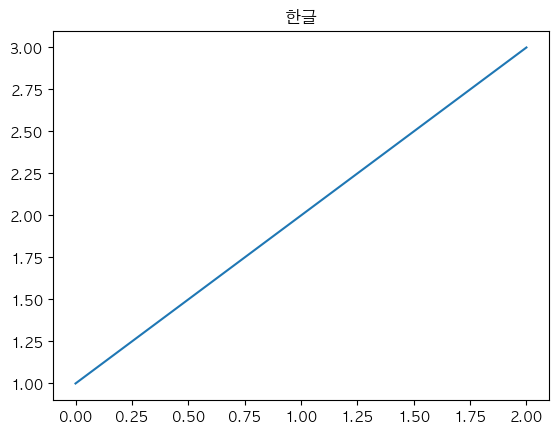

In [2]:
import warnings
warnings.filterwarnings('ignore')
import prophet
print(prophet.__version__)
import pandas as pd
pd.set_option('display.max.columns', None)
from matplotlib import pyplot

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [3]:
path = './data/'
df = pd.read_csv(path + '울산_전처리_ver7.csv')
liquid = pd.read_csv(path + '액체_모델용.csv')
non_liquid = pd.read_csv(path + '비액체_모델용.csv')

In [4]:
df.head(2)

,Datetime,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
0,2020-01-01 01:00:00,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,2020-01-01 01:05:00,2020-01-01 08:15:00,MBU,1,SK2부두 01,석유제품 운반선,430.0,0.0,700.0,0.0,70.9,12.0,3.9,5.35,66.01,5,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0
1,2020-01-01 03:00:00,2020,1,1,3,D7CH,2020-01-01 03:40:00,2020-01-01 13:30,0,0.0,2020-01-01 03:40:00,2020-01-01 13:30:00,MBC,3,신항컨테이너부두 03,풀컨테이너선,590.0,0.0,9955.0,12383.0,135.0,24.8,8.2,11.20,135.00,40,12.6,315.0,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0


### 1. 월/주별 대기시간 시각화(액체화물)
- 시간대별 대기시간평균 / 건 수 분포 살피기 >> 시계열을 사용할만 한가?
- 뚜렷한 주기성이 보이지 않음

In [6]:
# 시간대별 대기시간평균
liquid['Datetime'] = pd.to_datetime(liquid['Datetime'])
liquid.head(2)

,Datetime,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),액체화물
0,2020-01-01 01:00:00,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,2020-01-01 01:05:00,2020-01-01 08:15:00,MBU,1,SK2부두 01,석유제품 운반선,430.0,0.0,700.0,0.0,70.9,12.0,3.9,5.35,66.01,5,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0,1
1,2020-01-01 03:00:00,2020,1,1,3,DSRB9,2020-01-01 03:05:00,2020-01-01 14:55,0,0.0,2020-01-01 03:05:00,2020-01-01 14:55:00,MBL,1,가스부두,LPG 운반선,710.0,0.0,2689.0,2999.0,96.0,15.0,7.2,7.20,90.10,5,12.6,315.0,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0,1


In [7]:
# 월별 접안_대기시간_분(평균)
temp = liquid[['Datetime', 'ETA_Year','ETA_Month', '접안_대기시간_분']]
temp.head()

,Datetime,ETA_Year,ETA_Month,접안_대기시간_분
0,2020-01-01 01:00:00,2020,1,0
1,2020-01-01 03:00:00,2020,1,0
2,2020-01-01 04:00:00,2020,1,0
3,2020-01-01 05:00:00,2020,1,0
4,2020-01-01 05:00:00,2020,1,517


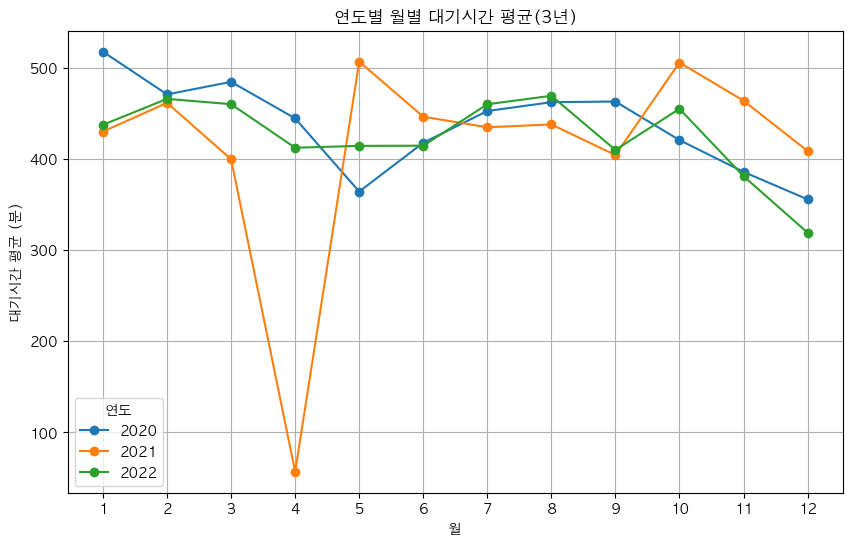

In [10]:
# 연도별로 데이터 분리하여 시각화
years = temp['ETA_Year'].unique()
yearly_data = [temp[temp['ETA_Year'] == year] for year in years]

plt.figure(figsize=(10, 6))

for year, data_year in zip(years, yearly_data):
    monthly_average = data_year.groupby(['ETA_Year', 'ETA_Month'])['접안_대기시간_분'].mean().reset_index()
    plt.plot(monthly_average['ETA_Month'], monthly_average['접안_대기시간_분'], marker='o', linestyle='-', label=str(year))

plt.title('연도별 월별 대기시간 평균(3년)')
plt.xlabel('월')
plt.ylabel('대기시간 평균 (분)')
plt.xticks(range(1, 13))
plt.legend(title='연도')
plt.grid(True)
plt.show()

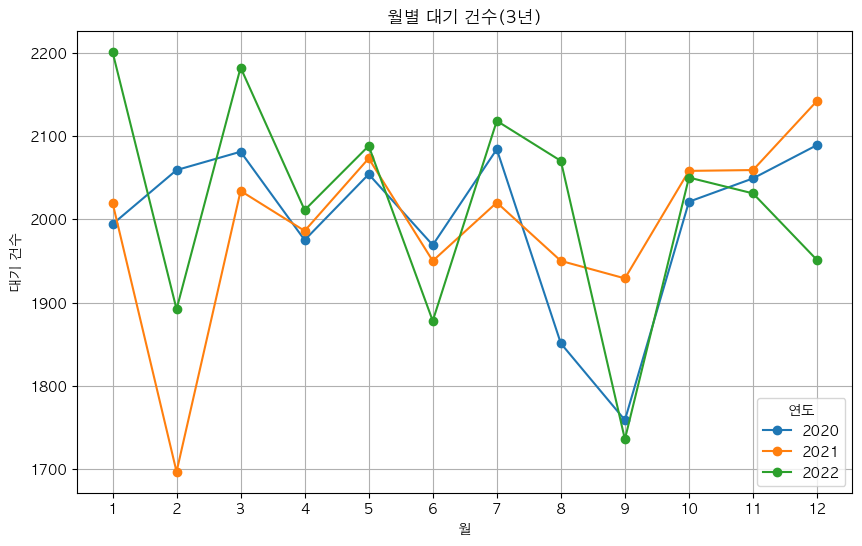

In [13]:
# 연도별로 데이터 분리
years = temp['ETA_Year'].unique()
yearly_data = [df[df['ETA_Year'] == year] for year in years]

plt.figure(figsize=(10, 6))

for year, data_year in zip(years, yearly_data):
    monthly_counts = data_year.groupby(['ETA_Year', 'ETA_Month']).size().reset_index(name='대기건수')
    plt.plot(monthly_counts['ETA_Month'], monthly_counts['대기건수'], marker='o', linestyle='-', label=str(year))
    
    
plt.title('월별 대기 건수(3년)')
plt.xlabel('월')
plt.ylabel('대기 건수')
plt.xticks(range(1, 13))
plt.legend(title='연도')
plt.grid(True)
plt.show()

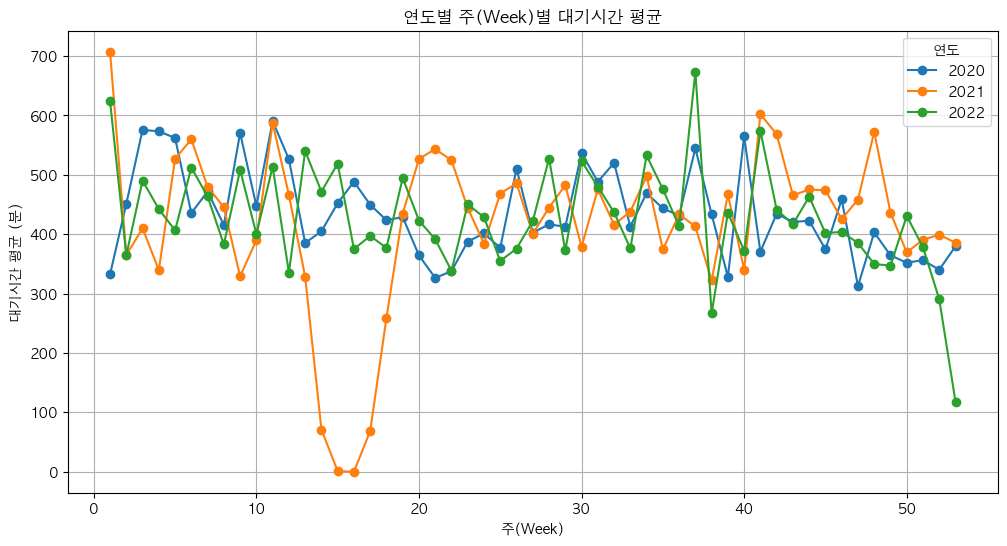

In [14]:
# Datetime 열을 날짜와 시간으로 분리 >> 3개년 주 별 대기시간 평균 계산
df = temp.copy()
df['Date'] = pd.to_datetime(df['Datetime']).dt.date

# 주차 정보 추가
df['주차'] = pd.to_datetime(df['Date']).dt.strftime('%U').astype(int) + 1

# 연도별로 데이터 분리
years = df['ETA_Year'].unique()
yearly_data = [df[df['ETA_Year'] == year] for year in years]

# 시각화
plt.figure(figsize=(12, 6))

for year, data_year in zip(years, yearly_data):
    weekly_average = data_year.groupby(['ETA_Year', '주차'])['접안_대기시간_분'].mean().reset_index()
    plt.plot(weekly_average['주차'], weekly_average['접안_대기시간_분'], marker='o', linestyle='-', label=str(year))

plt.title('연도별 주(Week)별 대기시간 평균')
plt.xlabel('주(Week)')
plt.ylabel('대기시간 평균 (분)')
plt.legend(title='연도')
plt.grid(True)
plt.show()

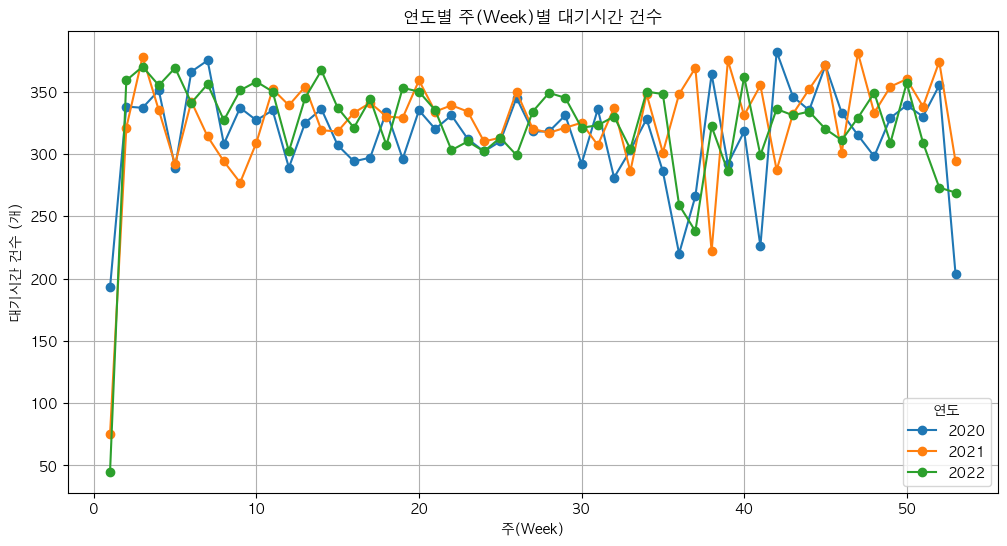

In [15]:
# Datetime 열을 날짜와 시간으로 분리 >> >> 3개년 주 별 대기시간 건 수 계산
df = temp.copy()
df['Date'] = pd.to_datetime(df['Datetime']).dt.date

# 주차 정보 추가
df['주차'] = pd.to_datetime(df['Date']).dt.strftime('%U').astype(int) + 1

# 연도별로 데이터 분리
years = df['ETA_Year'].unique()
yearly_data = [df[df['ETA_Year'] == year] for year in years]

# 시각화
plt.figure(figsize=(12, 6))

for year, data_year in zip(years, yearly_data):
    weekly_average = data_year.groupby(['ETA_Year', '주차'])['접안_대기시간_분'].size().reset_index(name='대기건수')
    plt.plot(weekly_average['주차'], weekly_average['대기건수'], marker='o', linestyle='-', label=str(year))

plt.title('연도별 주(Week)별 대기시간 건수')
plt.xlabel('주(Week)')
plt.ylabel('대기시간 건수 (개)')
plt.legend(title='연도')
plt.grid(True)
plt.show()

### 2. 선석 시각화(액체화물)

In [16]:
liquid.head(2)

,Datetime,ETA_Year,ETA_Month,ETA_Day,ETA_Hour,호출부호,입항일시,출항일시,접안_대기시간_분,출항_대기시간_분,Service_Time_Start,Service_Time_End,계선장소_코드,계선장소_숫자,계선장소명,선박용도,Service_Time_분,대기율,총톤수,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),ETA_Minute,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg),액체화물
0,2020-01-01 01:00:00,2020,1,1,1,88238,2020-01-01 01:05:00,2020-01-01 08:15,0,0.0,2020-01-01 01:05:00,2020-01-01 08:15:00,MBU,1,SK2부두 01,석유제품 운반선,430.0,0.0,700.0,0.0,70.9,12.0,3.9,5.35,66.01,5,9.3,330.0,12.2,1028.8,43.0,4.3,17.5,4.2,2.8,2.0,10.7,49.0,1
1,2020-01-01 03:00:00,2020,1,1,3,DSRB9,2020-01-01 03:05:00,2020-01-01 14:55,0,0.0,2020-01-01 03:05:00,2020-01-01 14:55:00,MBL,1,가스부두,LPG 운반선,710.0,0.0,2689.0,2999.0,96.0,15.0,7.2,7.20,90.10,5,12.6,315.0,15.3,1028.5,44.0,4.3,17.4,3.9,2.2,1.5,9.1,48.0,1


In [17]:
liquid.columns

Index(['Datetime', 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호',
       '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start',
       'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도',
       'Service_Time_분', '대기율', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '만재흘수(m)', '깊이(m)', '길이1(m)', 'ETA_Minute', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '액체화물'],
      dtype='object')

In [18]:
# 계선장소 코드/숫자 기준, 일자별 접안대기시간 정리
temp01 = liquid[['Datetime', '계선장소_코드', '계선장소_숫자', '접안_대기시간_분']]
temp01['계선장소'] = temp01['계선장소_코드'] + '_' + temp01['계선장소_숫자'].astype(str)

In [19]:
temp01.drop(columns = ['계선장소_코드', '계선장소_숫자'], inplace = True)
temp01.head(3)

,Datetime,접안_대기시간_분,계선장소
0,2020-01-01 01:00:00,0,MBU_1
1,2020-01-01 03:00:00,0,MBL_1
2,2020-01-01 04:00:00,0,MBU_12


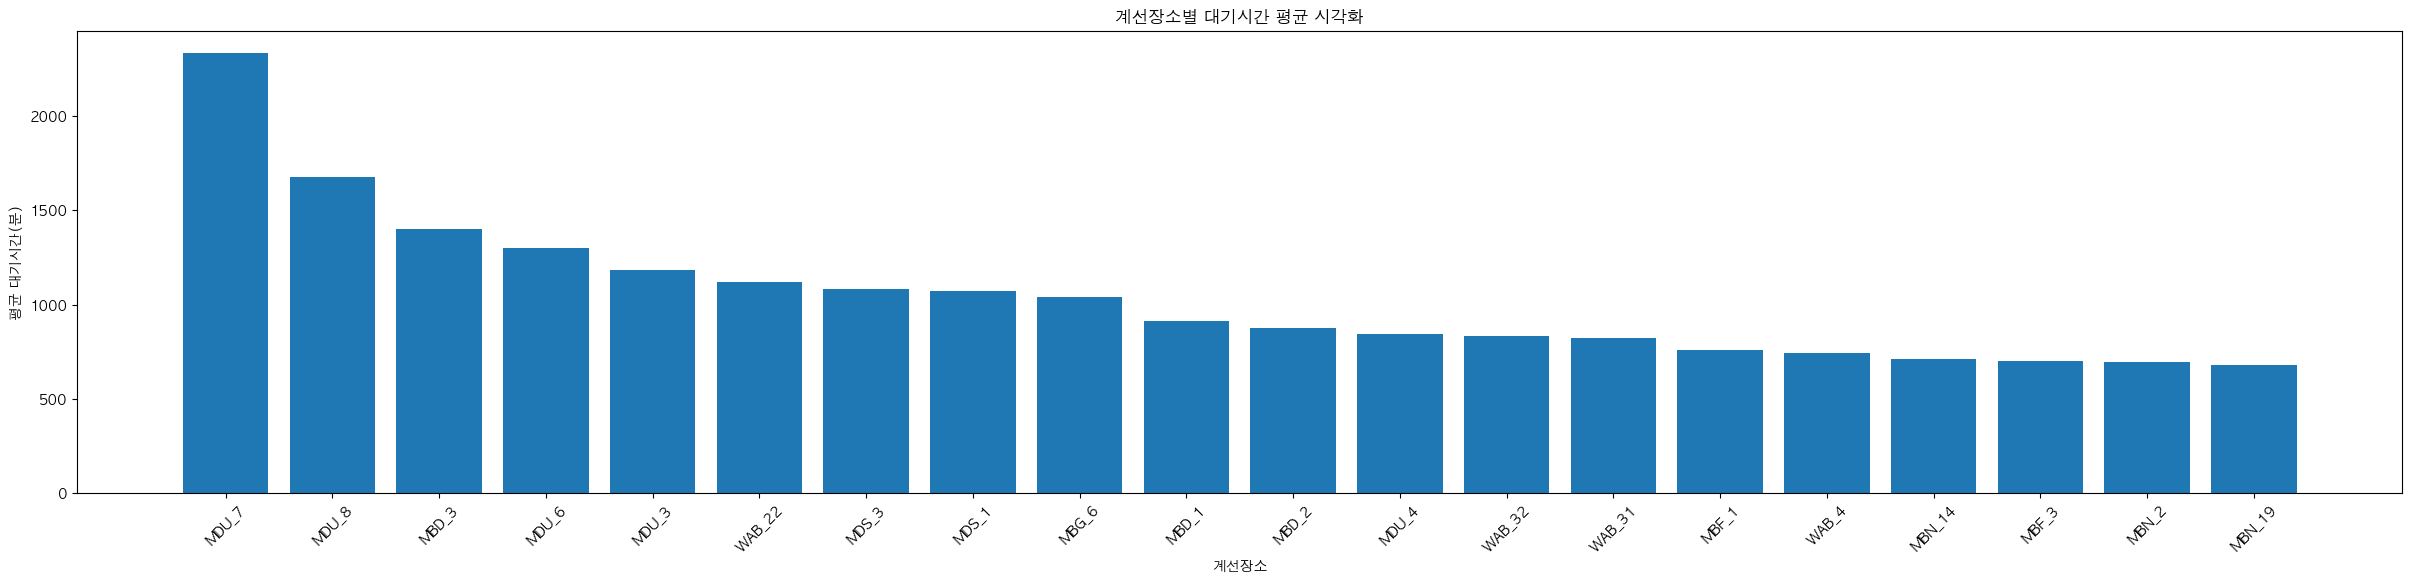

In [21]:
# 계선장소별 대기시간 평균 계산
average_wait_time = temp01.groupby('계선장소')['접안_대기시간_분'].mean().reset_index().sort_values(by = '접안_대기시간_분', ascending = False).head(20)

# 시각화
plt.figure(figsize=(30, 6))
plt.bar(average_wait_time['계선장소'], average_wait_time['접안_대기시간_분'])
plt.xlabel('계선장소')
plt.ylabel('평균 대기시간(분)')
plt.title('계선장소별 대기시간 평균 시각화')
plt.xticks(rotation=45)
plt.show()

### 3.시간대별 대기시간 평균 

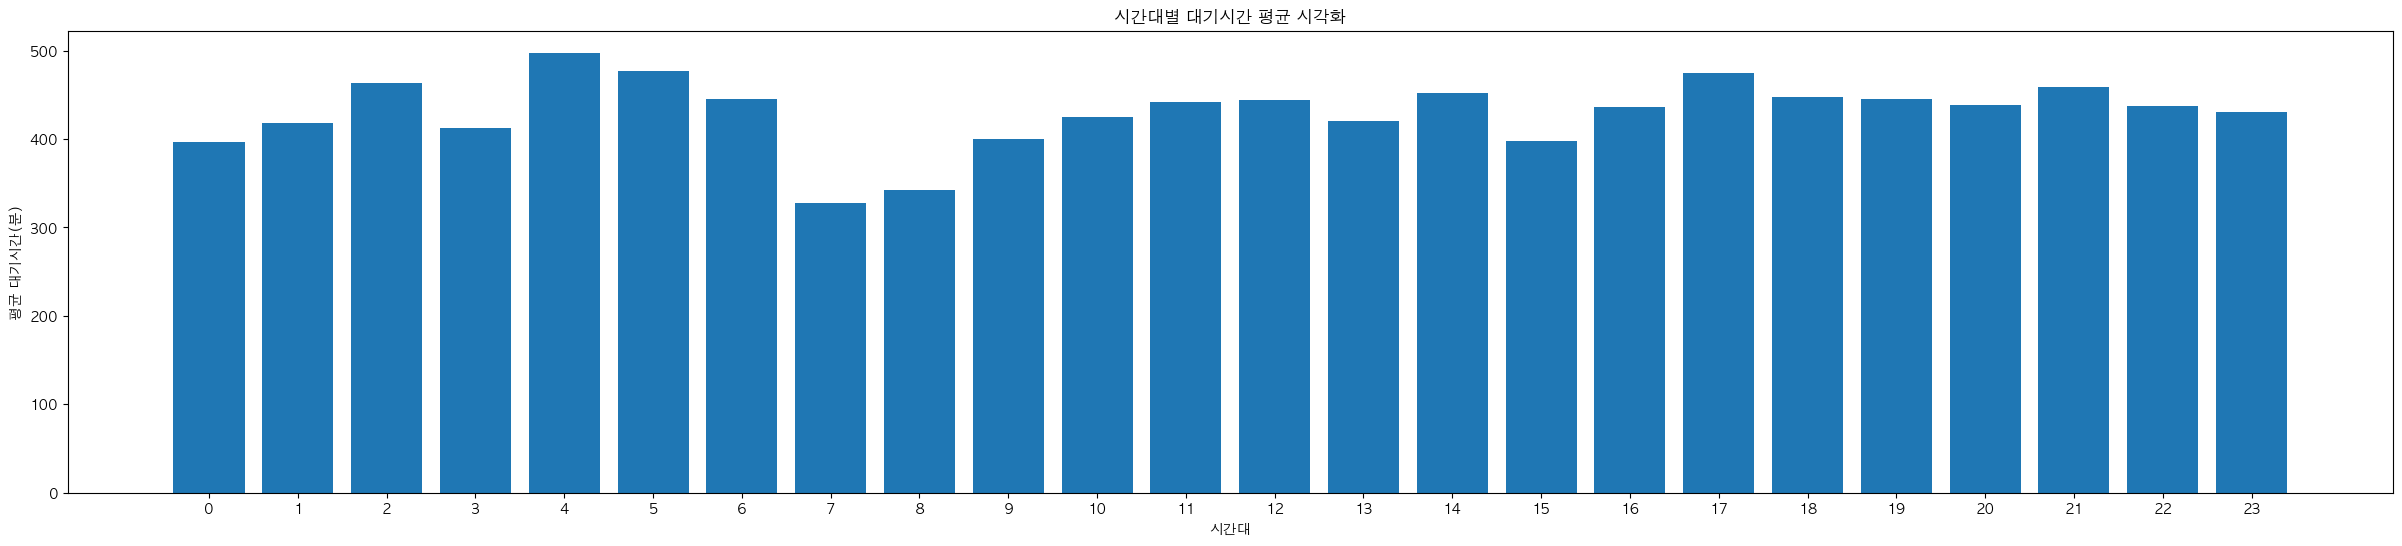

In [28]:
cols = ['ETA_Hour', '접안_대기시간_분']
temp02 = liquid[cols]
temp02.head()

hour_mean = temp02.groupby('ETA_Hour').mean()

plt.figure(figsize=(30, 6))
plt.bar(hour_mean.index, hour_mean['접안_대기시간_분'])
plt.xlabel('시간대')
plt.ylabel('평균 대기시간(분)')
plt.title('시간대별 대기시간 평균 시각화')
# plt.xticks(rotation=45)
plt.xticks(hour_mean.index)
plt.show()